# Fitting of dqdv peaks
The purpose of this notebook is to evaluate and develope a robust way of fitting dqdv data. The plan is then to implement this into the cellpy.utils.ica module (as seperate classes). It would also be valuable to equip the fitting class(es) with optional ipywidgets.

In [1]:
#%load_ext autoreload
#%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
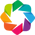

In [2]:
import os
import logging
import bokeh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cellpy import cellreader
from cellpy.utils import ica
import holoviews as hv

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline
hv.extension('bokeh')

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

my_data = cellreader.CellpyData()
filename = "../../../testdata/hdf5/20160805_test001_45_cc.h5"
assert os.path.isfile(filename)
my_data.load(filename)
my_data.set_mass(0.1)

from lmfit.models import GaussianModel, PseudoVoigtModel, ExponentialGaussianModel, SkewedGaussianModel, LorentzianModel, SkewedVoigtModel, ConstantModel
from lmfit import CompositeModel

## Defining dqdv peak ensambles
The natural way (and my impression is that this is how other groups also do it) of conducting an "in-depth" ica study on a LiB cell would be to measure ica of re-buildt half-cells of both the cathode and the anode of the full cells, fit the peaks of the half cells, and then a use convolution of these fits to fit the actual full cell.


### Examples from the literature
Should include references here...

### Plan
1. Create a class (PeakEnsamble)
2. Create peak ensambles by sub-classing PeakEnsamble

### ToDo
- [x] Fix so that it is possible to turn crystalline peak on and off for Si peaks
- [ ] Set peak attributes directly
- [ ] Make it easy (and obvious) to use previous fit-prms for new fit
- [x] Use `__add__`
- [x] Combine all fit-results into one dataframe
- [ ] Make a ipywidget for at least one of the prms (e.g. scale)
- [ ] Make it possible to freeze peaks and ensambles
- [ ] Make it possible to zero out peaks?
- [x] Fit negative of discharge curves
- [ ] Fit discharge and charge in one go? ("hysteresis parameter")

## The classes

### PeakEnsamble classes

In [3]:
class PeakEnsamble:
    """A PeakEnsamble consists of a scale and a set of peaks.
    
    The PeakEnsamble can be fitted with all the internal parameters fixed while only the scale parameter is
    varied (jitter=False), or the scale parameter is fixed while the internal parameters (individual peak heights etc)
    varied.
    
    Example:
        class SiliconPeak(PeakEnsamble):
            def __init__():
                super().__init__()
                self.name = name  # Set a prefix name
                self.prefixes = [self.name + "Scale", self.name + "01"]]
                self.peak_types = [ConstantModel, SkewedGaussianModel]
                self.a_new_variable = 12.0
                self._read_peak_definitions()
                self._init_peaks()
                
            def _read_peak_definitions(self):
                self._peak_definitions = {
                ....
                
            def _init_peaks(self):
                self._peaks = self._create_ensamble()
                self._set_hints()
                self._set_custom_hints()
                
            def _set_custom_hints(self):
                ....
        
    Attributes:
        shift (float): A common shift for all peaks in the ensamble. Should be able to fit
           this if jitter is False. TODO: chekc this up.
        name (str): Identification label that will be put in front of all peak parameter names.
        fixed (bool): 
        jitter (bool): Allow for individual fitting of the peaks in the ensamble (defaults to True).
        max_point (float): The max point of the principal peak.
        scale (float): An overall scaling parameter (fitted if jitter=False).
        sigma_p1 (float): Sigma value for the principal peak (usually the first peak). When creating the peak
            ensamble, parameters for the principal peak is set based on absolute values, while the other
            peak parameters are set based on relative values to the principal peak.
        prefixes (list): Must be set in the subclass.
        
    Notes:
        The function ``_read_peak_definitions`` should store the peak definitions in the 
        attribute ``_peak_definitions``.
        
        The ``_peak_definitions`` should be a dictionary with peak properties as keys (e.g. "amplitude", "sigma").
        Each dictionary value is a (nested) list where the first item is the value for the principal peak, the
        second item is a tuple describing how to set the limits (min, max) for the peak. Later items corresponds
        to new peaks where the values are given relative to the principal peak:
        
        "key": [
            v, ((f_min, s_min), (f_max, s_max)),   # principal peak
            (f_v, s_v),                            # next peak
            .....
        ]
        
        where, for the principal peak we have:
        
            v is the value,
            f_min * (v + s_min) is the min limit
            f_max * (v + s_max) is the max limit
            
        for subsequent peaks, replace v with the f_v * (v + s_v) 
            
        
        
    """
    def __init__(self, fixed=False, name=None, max_point=1.0, 
                 shift=0.0, sigma_p1=0.01, scale=1.0, jitter=True):
        logger.debug("-init-")
        self._peaks = None
        self.shift = shift
        self.name = name
        self.fixed = fixed
        self.max_point = max_point
        self.jitter = jitter
        self.scale = scale
        self.sigma_p1 = sigma_p1
        self.peak_info = dict()
        self._peak_definitions = None
        self._peak_definition_dict = None
        self.peak_var_names = None
        self._params = None
        
    def update_peak_parameter(self, name, **kwargs):
        logger.debug("update peak parameters")
        self._peaks.set_param_hint(name, **kwargs)
        self._make_params()
        
    def create_hints_from_parameters(self, prm=None):
        logger.debug("creating param_hints so that they are in-line with the current params")
        if prm is not None:
            p = self.params[prm]
            self._peaks.set_param_hint(
                prm, min=p.min, max=p.max, value=p.value, vary=p.vary,
            )
            return
        
        for prm in self.params:
            p = self.params[prm]
            self._peaks.set_param_hint(
                prm, min=p.min, max=p.max, value=p.value, vary=p.vary,
            )
        
    def reset_peaks(self):
        self._init_peaks()
        self._custom_init_peaks()
        self._make_params()
        
    def init(self):
        self._read_peak_definitions()
        self.reset_peaks()
        
    @property
    def peaks(self):
        """lmfit.CompositeModel"""
        return self._peaks
    
    @property
    def widgets(self):
        """ipywidgets for controlling peak variables"""
        raise NotImplementedError("This method is not ready to be used yet")
    
    @property
    def params(self):
        """lmfit.Parameters (OrderedDict)"""
        if self._params is None:
            self._make_params()
        return self._params
    
    def _make_params(self):
        self._params = self._peaks.make_params()
        
    def _read_peak_definitions(self, *args, **kwargs):
        """Load peak definitions."""
        raise NotImplementedError("This method must be implemented when sub-classing")
        
    @property
    def peak_definitions(self):
        return self._peak_definitions
    
    def _init_peaks(self):
        self._peaks = self._create_ensamble()
        self._set_hints()
        
    def _custom_init_peaks(self):        
        pass
        
    def _create_ensamble(self):
        try:
            self.peak_info[self.prefixes[0]] = self.peak_types[0](prefix=self.prefixes[0])
            self.peak_info[self.prefixes[1]] = self.peak_types[1](prefix=self.prefixes[1])
        except AttributeError:
            logger.warning("you are missing peak info")
            return
        
        p = self.peak_info[self.prefixes[1]]

        for prfx, ptype in zip(self.prefixes[2:], self.peak_types[2:]):
            self.peak_info[prfx] = ptype(prefix=prfx)
            p += self.peak_info[prfx]
            
        p *= self.peak_info[self.prefixes[0]]
        return p
    
    def _create_default_peak_definition_dict(self):
        value_dict = dict()
        peak_definitions = self.peak_definitions 
        prefix_peak_1 = self.prefixes[1]

        # iterate through all the peaks (not the scale) and collect variables in the value_dict
        for var_stub in peak_definitions:
            dd = peak_definitions[var_stub]
            val_1, ((frac_min, shift_min), (frac_max, shift_max)) = dd[0:2]

            v_dict = dict()
            v_dict[prefix_peak_1] = [val_1, frac_min * (val_1+shift_min), frac_max * (val_1+shift_max)]
        
            for prfx, (fact, step) in zip(self.prefixes[2:], dd[2:]):
                v_dict[prfx] = [fact * (x + step) for x in v_dict[prefix_peak_1]]

            value_dict[var_stub] = v_dict
        
        logger.debug("created default peak definitions")
        logger.debug(value_dict)
        self._peak_definition_dict = value_dict
        
    def _set_one_hint(self, key1, key2):
        logger.debug(f"setting hint ({key1}:{key2})")
        jitter = self.jitter
        if self.jitter:
            vary = True
            vary_scale = False
        else:
            vary = False
            vary_scale = True
            
        value_dict = self._peak_definition_dict
        _vary = vary
        _v = value_dict[key1][key2]
        k = "".join((key2, key1))
        self._peaks.set_param_hint(k, value=_v[0], min=_v[1], max=_v[2], vary=_vary)
        logger.debug(f"self._peaks.set_param_hint({k}, value={_v[0]}, min={_v[1]}, max={_v[2]}, vary={_vary})")
        
    def _set_hints(self):
        jitter = self.jitter
        if self.jitter:
            vary = True
            vary_scale = False
        else:
            vary = False
            vary_scale = True

        scale = self.scale
        prefix_scale = self.prefixes[0]
        self._create_default_peak_definition_dict()
        value_dict = self._peak_definition_dict
        
        # set parameter hints based on the value_dict
        for key1 in value_dict:
            for key2 in value_dict[key1]:
                self._set_one_hint(key1, key2)
                
        # set parameter hints for scale
        self._peaks.set_param_hint("".join((prefix_scale, "c")), value=scale, min=0.1*scale, max=10*scale, vary=vary_scale)
            
    
    def _fix_full(self, prefix):
        """fixes all variables (but only for this ensamble)"""
        for k in self._params:
            if k.startswith(prefix):
                self._params[k].vary = False
                
    def fit(self, *args, **kwargs):
        res = self.peaks.fit(*args, **kwargs)
        return res

class Silicon(PeakEnsamble):
    """Peak ensamble for silicon.
    
    This class is a sub-class of PeakEnsamble. Some new attributes are defined
    (in addtion to the inhereted attributes).
    
    Attributes:
        prefixes (list): A list of peak names used as the prefix when creating the peaks. The firs prefix
            should always be for the scale parameter. It is recommended not to play with this attribute.
            This attribute is required when subclassing PeakEnsamble
        peak_types (list of lmfit peak models): The length of this list must be the same as the length of the
            prefixes. It should start with a ConstantModel. This attribute is required when subclassing
            PeakEnsamble.
        crystalline (bool): Set to true if the Li3.75Si phase exists.
        
    """
    def __init__(self, scale=1.0, crystalline=False, name="Si", max_point=1000, jitter=True,
                 crystalline_hysteresis=0.0, compress=1.0, expand=1.0,
                 **kwargs):
        """
        Parameters:
            scale (float): overall scaling of the peak ensamble
            crystalline (bool): set to True if the crystalline peak should be included
            name (str): pre-name that will start all parameters
            max_point (float): max point
            jitter (bool): allow for individual changes between the peaks if True, fix
                all individual inter-peak prms if False.
            crystalline_hysteresis (float): additional hysteresis for crystalline peak
        """
        super().__init__(sigma_p1=0.1, jitter=jitter, scale=scale, max_point=max_point, **kwargs)
        logger.debug("silicon -init-")
        self.name = name
        self.prefixes = [self.name + x for x in ["Scale", "01", "02", "03"]]  # Always start with scale
        self.peak_types = [ConstantModel, SkewedGaussianModel, PseudoVoigtModel, PseudoVoigtModel]
        self._crystalline = crystalline
        self._crystalline_hysteresis = crystalline_hysteresis
        self._compress = compress
        self._expand = expand
        self.init()
                
        
    def _read_peak_definitions(self):
        logger.debug("reading peak defs for Si")
        self._peak_definitions = {
            "center": [
                0.25 + self.shift,          # value
                ((1.0, -0.1), (1.0, 0.1)),  # (frac-min, shift-min), (frac-max, shift-max)
                (1.0, 0.21),                # (value-frac, value-shift) between peak 1 and peak 2
                (1.0, 0.20 + self._crystalline_hysteresis)                 # (value-frac, value-shift) between peak 1 and peak 3
            ],
            
            "sigma": [
                self.sigma_p1,              # value
                ((0.5*self._expand, 0.0), (2.0*self._compress, 0.0)),  # (frac-min, shift-min), (frac-max, shift-max)
                (1.0, 0.0),                 # (value-frac, value-shift) between peak 1 and peak 2
                (0.3, 0.0)
            ],
            
            "amplitude": [
                self.sigma_p1 * self.max_point / 0.4,   # value
                ((0.001, 0.0), (100.0, 0.0)),      # (frac-min, shift-min), (frac-max, shift-max)
                (1.0, 0.0), 
                (1.0, 0.0)
            ],
            "gamma": [
                1.0,   # value
                ((0.001, 0.0), (2.0, 0.0)),      # (frac min, shift min), (frac max, shift max)
                (1.0, 0.0), 
                (1.0, 0.0)
            ]
        }
        
    def _custom_init_peaks(self):
        logger.debug("-custom peak init")
        self._set_custom_hints()
        
    def _set_custom_hints(self):
        logger.debug("-setting custom hints")
        if not self._crystalline:
            self._unset_crystalline()

    def _unset_crystalline(self):
        logger.debug("-removing crystalline peak from fit")
        prefix_p3 = self.prefixes[3]
        k = "".join([prefix_p3, "amplitude"])
        self._peaks.set_param_hint(k, value=0.00001, min=0.000001, vary=False)
        k = "".join([prefix_p3, "fraction"])
        self._peaks.set_param_hint(k, value=0.00001, min=0.000001, vary=False)
        for n in ["center", "sigma"]:
            k = "".join([prefix_p3, n])
            self._peaks.set_param_hint(k, vary=False)
        self._make_params()
        
    def _set_crystalline(self):
        logger.debug("-including crystalline peak for fit")
        prefix_p3 = self.prefixes[3]
      #  a = self._peak_definitions["amplitude"][0]
      #  b = self._peak_definitions["amplitude"][3][0]
     #   ab_min = self._peak_definitions["amplitude"][3][0]
      #  k = "".join([prefix_p3, "amplitude"])
       # self._peaks.set_param_hint(k, value=a*b, min=0.000001, vary=True)

        # NEW - from here
        self._set_one_hint("amplitude", prefix_p3)
        self._set_one_hint("center", prefix_p3)
        self._set_one_hint("sigma", prefix_p3)
        k = "".join([prefix_p3, "fraction"])
        self._peaks.set_param_hint(k, value=1.0000, min=0.001, vary=True)
        # -- to here
        
        #logger.debug(f"set_param_hint({k}, value={a*b}, min= 0.000001, vary=True)")
        #for n in ["center", "sigma"]:
        #    k = "".join([prefix_p3, n])
         #   self._peaks.set_param_hint(k, vary=True)
          #  logger.debug(f"set_param_hint({k}, vary=True)")
        self._make_params()
    
    @property
    def crystalline(self):
        return self._crystalline
    
    @crystalline.setter
    def crystalline(self, value):
        if not value and self._crystalline:
            self._unset_crystalline()
        if not self._crystalline and value:
            self._set_crystalline()
            
        self._crystalline = value
    
    @property     
    def widgets(self):
        print("overrides PeakEnsamble.widgets property")
        print("because it is easier to develop this here and then copy it back to the subclass")
        
        # Need a widget set for each parameter
        # Should consist of
        #   value with max and min
        #   refine checkbox
        
        # Example
        #   Name: Si_peak01_amplitude
        #   [min] -----o--- [max] [value]
        #   Fixed: x
        
        # The ipywidgets should be coupled to the lmfit.prms somehow
        
        # Need a combined set with all the sub-widgets where the individual peak widgets are
        # greyed out if jitter is not selected
    
    
class Graphite(PeakEnsamble):
    def __init__(self, scale=1.0, name="G", jitter=False, **kwargs):
        super().__init__(max_point=10000.0, jitter=jitter, **kwargs)
        self.name = name
        self.sigma_p1 = 0.01
        self.vary = False
        self.vary_scale = True
        self.prefixes = [self.name + x for x in ["Scale", "01"]]  # Always start with scale
        self.peak_types = [ConstantModel, LorentzianModel]
        self.init()
        
    def _read_peak_definitions(self):
        self._peak_definitions = {
            "center": [
                0.16 + self.shift,          # value
                ((1.0, -0.05), (1.0, 0.05)),  # (frac-min, shift-min), (frac-max, shift-max)
                # (1.0, 0.21),                # (value-frac, value-shift) between peak 1 and peak 2
                # (1.0, 0.20)                 # (value-frac, value-shift) between peak 1 and peak 3
            ],
            
            "sigma": [
                self.sigma_p1,                   # value
                ((0.4, 0.0), (5.0, 0.0)),  # (frac-min, shift-min), (frac-max, shift-max)
                # (1.0, 0.0), 
                # (0.3, 0.0)
            ],
            
            "amplitude": [
                self.sigma_p1 * self.max_point / 0.4,   # value
                ((0.2, 0.0), (2.0, 0.0)),      # (frac-min, shift-min), (frac-max, shift-max)
                # (1.0, 0.0), 
                # (0.002, 0.0)
            ],
        }


In [4]:
class CompositeEnsamble():
    def __init__(self, *ensambles, **kwargs):
        self.ensamble = list(ensambles)
        self._peaks = None
        self._params = None
        self._join()
        
    def _join(self):
        if len(self.ensamble) > 0:
            peaks_left = self.ensamble[0].peaks
            prefixes_left = self.ensamble[0].prefixes
            params_left = self.ensamble[0].params
            
            if len(self.ensamble) > 1:
                for ens in self.ensamble[1:]:
                    peaks_left += ens.peaks
                    prefixes_left += ens.prefixes
                    params_left += ens.params
           
            self._peaks = peaks_left
            self._params = params_left
            self.prefixes = prefixes_left
            
    def __add__(self, ensamble):
        self.add(ensamble)
        return self
        
    def __radd__(self, other):
        if other == 0:
            return self
        else:
            return self.add(ensamble)

        
    def add(self, ensambles):
        if isinstance(ensambles, (list, tuple)):
            for e in ensambles:
                self.ensamble.append(e)
        else:
            self.ensamble.append(ensambles)
        self._join()
        
    def update_peak_parameter(self, name, **kwargs):
        self._peaks.set_param_hint(name, **kwargs)
        self._params = self._peaks.make_params()
    
    def create_hints_from_parameters(self, prm=None):
        logger.debug("creating param_hints so that they are in-line with the current params")
        if prm is not None:
            p = self.params[prm]
            self._peaks.set_param_hint(
                prm, min=p.min, max=p.max, value=p.value, vary=p.vary,
            )
            return
        
        for prm in self.params:
            p = self.params[prm]
            self._peaks.set_param_hint(
                prm, min=p.min, max=p.max, value=p.value, vary=p.vary,
            )
    
    def reset_peaks(self):
        for ens in self.ensamble:
            ens.reset_peaks()
        self._join()
        #self.make_params()
        
    def fit(self, *args, **kwargs):
        res = self._peaks.fit(*args, **kwargs)
        return res
        
    @property
    def params(self):
        return self._params
    
    @property
    def param_names(self):
        return self._peaks.param_names
    
    @property
    def param_hints(self):
        return self._peaks.param_hints


## Useful functions

In [5]:
def get_widgets(parameters):
    print(parameters)
    

def fix(prefix):
    _pars = p.make_params()
    for k in _pars:
        if k.startswith(prefix):
            p[k].vary = False

def fitplot(v, dq, res, group_title="fit", invert_dq=False, invert_res=False, table=False, width=500, height=500, size=8):
    if invert_dq:
        dq = -dq
        
    i = 1
    if invert_res:
        i = -1
        
    raw = hv.Points((v, dq), label="raw", group=group_title).opts(
        width=width, height=height, size=size, alpha=0.3,
        xlabel="Voltage",
        ylabel="dQ/dv",
    )
    
    prt = {
        "init": hv.Curve((v, i * res.init_fit), group=group_title).opts(alpha=0.5),
        "best": hv.Curve((v, i * res.best_fit), group=group_title),
    }
    
    parts = res.eval_components()

    for key in parts:
        if not key.endswith("Scale"):
            prt[key] = hv.Curve((v, i * parts[key]), group=group_title)
            
    layout = raw * hv.NdOverlay(prt)
    
    if table:
        x = res.best_values
        variables = list(x.keys())
        values = list(x.values())
        lim_min = [res.params[k].min for k in variables]
        lim_max = [res.params[k].max for k in variables]
        vary = [res.params[k].vary for k in variables]
        # expr = [res.params[k].expr for k in variables]
        
        fit_values = {
            "var": variables,
            "val": values,
            "min": lim_min,
            "max": lim_max,
            "vary": vary,
            # "expr": expr,
        }
        
        df_fit_values = pd.DataFrame(fit_values)
        labels_fit_values = hv.Table(df_fit_values).opts(width=700, height=height)

        layout = layout + labels_fit_values
        
    return layout 

## TASKS

#### ipywidgets
Status: Not ready

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [7]:
class SimpleClass:
    def __init__(self, v=10.0):
        self.v = v
        
    def __str__(self):
        return str(self.v)

In [8]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [9]:
v = SimpleClass()

In [10]:
def f(x):
    print(f"setting value to {x}")
    v.v = x

In [11]:
w.value = v.v

In [12]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [13]:
print(v)

10


In [14]:
import param

In [15]:
import ipywidgets as widgets
from IPython.display import display
V = SimpleClass()
slider = widgets.IntSlider()
slider.value = V.v

def on_change(v):
    V.v = v['new'] 
    
slider.observe(on_change, names='value')
display(slider)

IntSlider(value=10)

In [16]:
print(V)

10.0


In [17]:
class StyleOptions(param.Parameterized):
    alpha = param.Magnitude(default=0.8)
    color = param.ObjectSelector(default='red', objects=['red', 'green', 'blue'])
    line_width = param.Number(default=1, bounds=(0, 10)) 

In [18]:
opts = StyleOptions(name="")
opts

StyleOptions(alpha=0.8, color='red', line_width=1, name='')

In [19]:
cha, volt = my_data.get_dcap(2)
v, dq = ica.dqdv(volt, cha)

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [20]:
p_si = Silicon()

#### Fitting discharge data
Status: OK

In [21]:
cha, volt = my_data.get_dcap(2)
v, dq = ica.dqdv(volt, cha)

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [22]:
silicon = Silicon(shift=-0.1)
graphite = Graphite(shift=-0.03)
dpeaks = CompositeEnsamble()
dpeaks += silicon
dpeaks.add(graphite)

res = dpeaks.fit(-dq, x=v)
layout_d = fitplot(v, dq, res, invert_res=True, group_title="discharge", table=True)
layout_d

:Layout
   .Discharge.I :Overlay
      .Discharge.Raw :Points   [x,y]
      .Discharge.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I     :Table   [var,val,min,max,vary]

In [23]:
cha, volt = my_data.get_dcap(6)
v, dq = ica.dqdv(volt, cha)
dpeaks = CompositeEnsamble(Silicon(shift=-0.1), Graphite(shift=-0.03))
res = dpeaks.fit(-dq, x=v)
layout_d = fitplot(v, dq, res, invert_res=True, group_title="discharge", table=True)
layout_d

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


:Layout
   .Discharge.I :Overlay
      .Discharge.Raw :Points   [x,y]
      .Discharge.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I     :Table   [var,val,min,max,vary]

#### Set new parameter values, limits, etc
Status: usable, but not finished

In [24]:
# setting peak values
# -------------------
# method one (seems a bit convoluted)
#p_si = Silicon()
#p_si.params['Si02sigma'].min = 0
#p_si.peaks.set_param_hint('Si02sigma', min=0.0)

# method two (simpler?)
p_si = Silicon()
p_si.peaks.set_param_hint('Si02sigma', min=2.2)
p_si.peaks.make_params()
p_si.params["Si02sigma"]

<Parameter 'Si02sigma', 0.1, bounds=[0.05:0.2]>

In [25]:
# method two implemented in PeakEnsamble
p_si = Silicon()
print(f"hint: {p_si.peaks.param_hints['Si02sigma']} val: {p_si.params['Si02sigma']}")
p_si.update_peak_parameter('Si02sigma', min=0.02, vary=False)
print(f"hint: {p_si.peaks.param_hints['Si02sigma']} val: {p_si.params['Si02sigma']}")
p_si.reset_peaks()
print(f"hint: {p_si.peaks.param_hints['Si02sigma']} val: {p_si.params['Si02sigma']}")

hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.05:0.2]>
hint: OrderedDict([('min', 0.02), ('value', 0.1), ('max', 0.2), ('vary', False)]) val: <Parameter 'Si02sigma', value=0.1 (fixed), bounds=[0.02:0.2]>
hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.05:0.2]>


In [26]:
prm = "Si02sigma"
step = 0.01
p_si.params[prm].min += step
print(f"hint: {p_si.peaks.param_hints[prm]} val: {p_si.params[prm]}")

# hints are not autmatically updated
p_si.create_hints_from_parameters(prm)
print(f"hint: {p_si.peaks.param_hints[prm]} val: {p_si.params[prm]}")

hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.060000000000000005:0.2]>
hint: OrderedDict([('min', 0.060000000000000005), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.060000000000000005:0.2]>


In [27]:
# method two implemented in CompositeEnsamble
p_t = CompositeEnsamble(Silicon(), Graphite())
print(f"hint: {p_t.param_hints['Si02sigma']} val: {p_t.params['Si02sigma']}")
p_t.update_peak_parameter('Si02sigma', min=0.02, vary=False)
print(f"hint: {p_t.param_hints['Si02sigma']} val: {p_t.params['Si02sigma']}")
p_t.reset_peaks()
print(f"hint: {p_t.param_hints['Si02sigma']} val: {p_t.params['Si02sigma']}")

hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.05:0.2]>
hint: OrderedDict([('min', 0.02), ('value', 0.1), ('max', 0.2), ('vary', False)]) val: <Parameter 'Si02sigma', value=0.1 (fixed), bounds=[0.02:0.2]>
hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.05:0.2]>


In [28]:
prm = "Si02sigma"
step = 0.01
p_t.params[prm].min += step
print(f"hint: {p_t.param_hints[prm]} val: {p_t.params[prm]}")

# hints are not autmatically updated
#p_t.create_hints_from_parameters(prm)
print(f"hint: {p_t.param_hints[prm]} val: {p_t.params[prm]}")

hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.060000000000000005:0.2]>
hint: OrderedDict([('min', 0.05), ('value', 0.1), ('max', 0.2), ('vary', True)]) val: <Parameter 'Si02sigma', 0.1, bounds=[0.060000000000000005:0.2]>


In [29]:
cha, volt = my_data.get_ccap(4)
v, dq = ica.dqdv(volt, cha)

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [30]:
p_t._peaks.set_param_hint(prm, min=0.12)

In [31]:
# using params_hints
res1 = p_t.fit(dq, x=v)
layout = fitplot(v, dq, res1, table=True)
layout

:Layout
   .Fit.I   :Overlay
      .Fit.Raw :Points   [x,y]
      .Fit.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I :Table   [var,val,min,max,vary]

In [32]:
# using params
res2 = p_t.fit(dq, p_t.params, x=v)
layout = fitplot(v, dq, res2, table=True)
layout

:Layout
   .Fit.I   :Overlay
      .Fit.Raw :Points   [x,y]
      .Fit.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I :Table   [var,val,min,max,vary]

##### Comments
It seems that there are a multitude of ways to set parameters (params, or param_hints).
When fitting, the default seems to be to use the param_hints. Though, you can also pass the
parameters directly to the `fit` function.

Since `fit` is overridden in our classes, I have the opportunity to fix how it is done.

This is the nethodology chosen:

(to be implemented)

#### Lock the fit-procedure
Make a decition how the `fit` method should be implemented.

Status: Not done

#### Collect fit-results
Status: OK

In [33]:
def f(n, p, **kwargs):
    # could invent a better name for this function, maybe...
    cha, volt = my_data.get_ccap(n)
    v, dq = ica.dqdv(volt, cha)
    res = p.fit(dq, x=v)
    layout = fitplot(v, dq, res, **kwargs)
    return res, layout

In [34]:
d = dict()
r = dict()
peaks = CompositeEnsamble(Silicon(crystalline=True), Graphite())
cycle_numbers = my_data.get_cycle_numbers()
for n in cycle_numbers:
    if n == 2:
        print("turning off crystalline peak")
        peaks.ensamble[0].crystalline = False
    try:
        print(f"Fitting cycle {n}", end=" ")
        r[n], d[n] = f(n, peaks, width=300)
        print("-> OK")
    except:
        print("OH NO, Failed!")

Fitting cycle 1 

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


-> OK
turning off crystalline peak
Fitting cycle 2 -> OK
Fitting cycle 3 -> OK
Fitting cycle 4 -> OK
Fitting cycle 5 -> OK
Fitting cycle 6 -> OK
Fitting cycle 7 -> OK
Fitting cycle 8 -> OK
Fitting cycle 9 -> OK
Fitting cycle 10 -> OK
Fitting cycle 11 -> OK
Fitting cycle 12 -> OK
Fitting cycle 13 -> OK
Fitting cycle 14 -> OK
Fitting cycle 15 -> OK
Fitting cycle 16 -> OK
Fitting cycle 17 -> OK
Fitting cycle 18 OH NO, Failed!


In [35]:
%%opts Curve [width=300]
NdLayout = hv.NdLayout(d, kdims='cycle').cols(4)
NdLayout

:NdLayout   [cycle]
   :Overlay
      .Fit.Raw :Points   [x,y]
      .Fit.I   :NdOverlay   [Element]
         :Curve   [x]   (y)

In [36]:
def extract_parameter_values(res):
    x = res.best_values
    variables = list(x.keys())
    
    values = list(x.values())
    lim_min = [res.params[k].min for k in variables]
    lim_max = [res.params[k].max for k in variables]
    vary = [res.params[k].vary for k in variables]
    # expr = [res.params[k].expr for k in variables]

    fit_values = {
        "name": variables,
        "value": values,
        "min": lim_min,
        "max": lim_max,
        "vary": vary,
        # "expr": expr,
    }

    df_fit_values = pd.DataFrame(fit_values)
    df_fit_values.index.name = "parno"
    return df_fit_values

In [37]:
def combine_parameter_values(r):
    frames = list()
    for n in r:
        df = extract_parameter_values(r[n])
        df["cycle"] = n
        frames.append(df)
    combined = pd.concat(frames).reset_index()
    return combined

In [38]:
result = combine_parameter_values(r)

In [39]:
Si02center = result[result.name=="Si02center"]

In [40]:
curve = hv.Curve((Si02center.cycle, Si02center.value), ("Cycle"), ("Position (V)"))
points = hv.Scatter((Si02center.cycle, Si02center.value), ("Cycle"), ("Position (V)")).opts(size=12)
curve * points

:Overlay
   .Curve.I   :Curve   [Cycle]   (Position (V))
   .Scatter.I :Scatter   [Cycle]   (Position (V))

#### Fixing Crystalline peak problem
Status: Usable, but re-setting to crystalline from non-crystalline seems to have some hick-ups

In [41]:
p_not = CompositeEnsamble(Silicon(), Graphite())
p_is = CompositeEnsamble(Silicon(crystalline=True), Graphite())

In [42]:
# -getting data
cha, volt = my_data.get_ccap(1)
v, dq = ica.dqdv(volt, cha)

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [43]:
res_is = p_is.fit(dq, x=v)
layout_cryst = fitplot(v, dq, res_is, group_title="With crystalline peak", table=True)
layout_cryst

:Layout
   .With_crystalline_peak.I :Overlay
      .With_crystalline_peak.Raw :Points   [x,y]
      .With_crystalline_peak.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I                 :Table   [var,val,min,max,vary]

In [44]:
res_not = p_not.fit(dq, x=v)
layout_not = fitplot(v, dq, res_not, group_title="Without crystalline peak", table=True)
layout_not

:Layout
   .Without_crystalline_peak.I :Overlay
      .Without_crystalline_peak.Raw :Points   [x,y]
      .Without_crystalline_peak.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I                    :Table   [var,val,min,max,vary]

In [45]:
p_not.ensamble[0].crystalline = True
res_not_is = p_not.fit(dq, x=v)
layout_not_is = fitplot(v, dq, res_not_is, group_title="With added crystalline peak", table=True)
layout_not_is

:Layout
   .With_added_crystalline_peak.I :Overlay
      .With_added_crystalline_peak.Raw :Points   [x,y]
      .With_added_crystalline_peak.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I                       :Table   [var,val,min,max,vary]

In [46]:
# -getting data
cha, volt = my_data.get_ccap(2)
v2, dq2 = ica.dqdv(volt, cha)

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [47]:
p_is.ensamble[0].crystalline = False
# remark! should find out a way to safely transfer or copy the objects if we would like to keep the initial object unchanged
# (this cuould be valuable when using a notebook to prevent problems with excecution order)
res_is2 = p_is.fit(dq2, x=v2)
layout_cryst2 = fitplot(v2, dq2, res_is2, table=True)
layout_cryst2

:Layout
   .Fit.I   :Overlay
      .Fit.Raw :Points   [x,y]
      .Fit.I   :NdOverlay   [Element]
         :Curve   [x]   (y)
   .Table.I :Table   [var,val,min,max,vary]

## OLD STUFF

In [48]:
# Method one (use the overloaded sum operator to make several peaks)
p1 = Silicon().peaks + Graphite().peaks
pars1 = p1.make_params()

In [49]:
# Method two (use CompositeEnsamble, the prefered method)
p2 = CompositeEnsamble(Silicon(), Graphite())

In [50]:
# Method three (consider creating methods for doing this more smoothly)
p3 = CompositeEnsamble()
p3.ensamble.append(Silicon())
p3.ensamble.append(Graphite())
p3._join()

In [51]:
# Method one and method tow should create the same result (wrt their peaks attribute)
assert p1.param_hints == p2._peaks.param_hints
assert p1.param_hints == p3._peaks.param_hints

In [52]:
# FITTING CRYSTALLINE PEAK DOES NOT WORK PROPERLY
#p2.ensamble[0].crystalline = True
#p2.ensamble[0].crystalline

In [53]:
# initial fit
# -getting data
cha, volt = my_data.get_ccap(1)
v, dq = ica.dqdv(volt, cha)

# -fitting
res = p2.fit(dq, x=v)
print("> OK <".center(80, "-"))
# -creating a plot
layout = fitplot(v, dq, res)
layout

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


-------------------------------------> OK <-------------------------------------


:Overlay
   .Fit.Raw :Points   [x,y]
   .Fit.I   :NdOverlay   [Element]
      :Curve   [x]   (y)

In [54]:
# Information about the fit
# -------------------------
# res.data the measurement data (y-values)
# res.init_fit calculated using the initial peak values (y-values)
# res.best_fit the best fit obtained after fitting (y-values)
# res.params contains fitted parameters object (use e.g. in p2.peaks.eval(params=res.params, x=v))
# res.best_values is a dictionary with the best fitted values (i.e a sub-set of res.params)
# res.fit_report() gives a summary of the fit statistics and values

In [55]:
def f(n, p, **kwargs):
    cha, volt = my_data.get_ccap(n)
    v, dq = ica.dqdv(volt, cha)
    res = p.fit(dq, x=v)
    layout = fitplot(v, dq, res, **kwargs)
    return layout

In [56]:
d = dict()
for n in my_data.get_cycle_numbers():
    try:
        print(f"Fitting cycle {n}", end=" ")
        d[n] = f(n, p2, width=300)
        print("-> OK")
    except:
        print("OH NO, Failed!")

Fitting cycle 1 

/Users/jepe/miniconda3/envs/cellpy/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


-> OK
Fitting cycle 2 -> OK
Fitting cycle 3 -> OK
Fitting cycle 4 -> OK
Fitting cycle 5 -> OK
Fitting cycle 6 -> OK
Fitting cycle 7 -> OK
Fitting cycle 8 -> OK
Fitting cycle 9 -> OK
Fitting cycle 10 -> OK
Fitting cycle 11 -> OK
Fitting cycle 12 -> OK
Fitting cycle 13 -> OK
Fitting cycle 14 -> OK
Fitting cycle 15 -> OK
Fitting cycle 16 -> OK
Fitting cycle 17 -> OK
Fitting cycle 18 OH NO, Failed!


In [57]:
%%opts Curve [width=300]
NdLayout = hv.NdLayout(d, kdims='cycle').cols(4)
NdLayout

:NdLayout   [cycle]
   :Overlay
      .Fit.Raw :Points   [x,y]
      .Fit.I   :NdOverlay   [Element]
         :Curve   [x]   (y)